In [1]:
import pandas as pd

In [2]:
!ls

Untitled.ipynb
edit_success_20210303.04.03.1614746994_model_epoch0_ts10000.20210303.04.03.1614746138
edit_success_20210303.04.03.1614747484_model_epoch0_ts10000.20210303.04.03.1614746138
edit_success_20210303.05.03.1614747702_OTS
edit_success_20210305.01.03.1614906593_model_epoch0_ts2000.20210305.01.03.1614906455
edit_success_20210305.01.03.1614909223_model_epoch0_ts6000.20210305.01.03.1614908526
edit_success_20210305.01.03.1614909445_OTS
edit_success_20210310.04.03.1615349398_model_epoch0_ts10000.20210310.04.03.1615348977
edit_success_20210310.04.03.1615349831_OTS
edit_success_20210310.04.03.1615350532_model_epoch0_ts2000.20210310.02.03.1615343795
training


In [3]:
ots = pd.read_csv("edit_success_20210310.04.03.1615349831_OTS")

In [4]:
model = pd.read_csv("edit_success_20210310.04.03.1615350532_model_epoch0_ts2000.20210310.02.03.1615343795")

In [5]:
ots.success.mean()

0.76

In [6]:
model.success.mean()

0.68

In [7]:
ots.apply(lambda x: (x.new_ppl - x.orig_ppl)/x.orig_ppl, axis=1).mean()

-0.007361868100669812

In [8]:
model.apply(lambda x: (x.new_ppl - x.orig_ppl)/x.orig_ppl, axis=1).mean()

0.08258253797046938

In [9]:
ots.new_ppl.mean()

92.77693450927734

In [10]:
model.new_ppl.mean()

62.09111625671387

In [11]:
ots

,train_step,success,success_diff,new_rank,new_ppl,orig_rank,orig_ppl
0,0,True,572,802,93.087265,1374,93.465012
1,1,True,4,112,90.058601,116,93.465012
2,2,True,122,1368,90.216431,1490,93.465012
3,3,False,-67,310,85.819489,243,93.465012
4,4,True,441,4819,89.033241,5260,93.465012
5,5,True,46,75,93.200081,121,93.465012
6,6,True,150,314,87.776169,464,93.465012
7,7,True,744,93,105.697029,837,93.465012
8,8,True,153,331,91.840508,484,93.465012
9,9,True,31,59,93.077011,90,93.465012


In [15]:
model[model.success].success_diff.mean()

223.5

In [16]:
ots[ots.success].success_diff.mean()

208.6578947368421

In [18]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

(array([13.,  7.,  5.,  5.,  2.,  2.,  0.,  2.,  0.,  2.]),
 array([  4. ,  83.7, 163.4, 243.1, 322.8, 402.5, 482.2, 561.9, 641.6,
        721.3, 801. ]),
 <BarContainer object of 10 artists>)

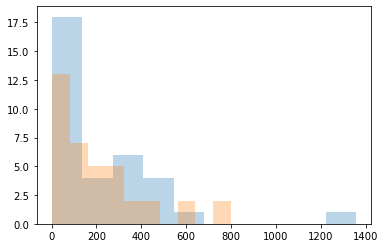

In [22]:
plt.hist(model[model.success].success_diff, alpha=0.3)
plt.hist(ots[ots.success].success_diff, alpha=0.3)

(array([6., 6., 3., 5., 9., 4., 3., 0., 1., 1.]),
 array([0.01874172, 0.10575643, 0.19277115, 0.27978587, 0.36680059,
        0.4538153 , 0.54083002, 0.62784474, 0.71485945, 0.80187417,
        0.88888889]),
 <BarContainer object of 10 artists>)

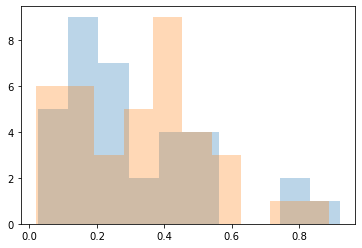

In [24]:
plt.hist(model[model.success].apply(lambda x: x.success_diff/x.orig_rank, axis=1), alpha=0.3)
plt.hist(ots[ots.success].apply(lambda x: x.success_diff/x.orig_rank, axis=1), alpha=0.3)